# IMPORT MODULES & DATA

In [1]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df_actions = pd.read_excel("Data class freeze.xlsx", sheet_name=0, index_col = 0)
df_bonds = pd.read_excel("Data class freeze.xlsx", sheet_name=1,index_col = 0)
df_commos = pd.read_excel("Data class freeze.xlsx", sheet_name=2,index_col = 0)

SPX = SP500;
SX5E = EURO STOXX 50;
SMI = Swiss market index;
MXEF = MSCI Emerging Markets Index;

In [22]:
#df_actions.head()
#df_commos.head()

# GRAPHIQUES DES DONNES

C:\Users\denig\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


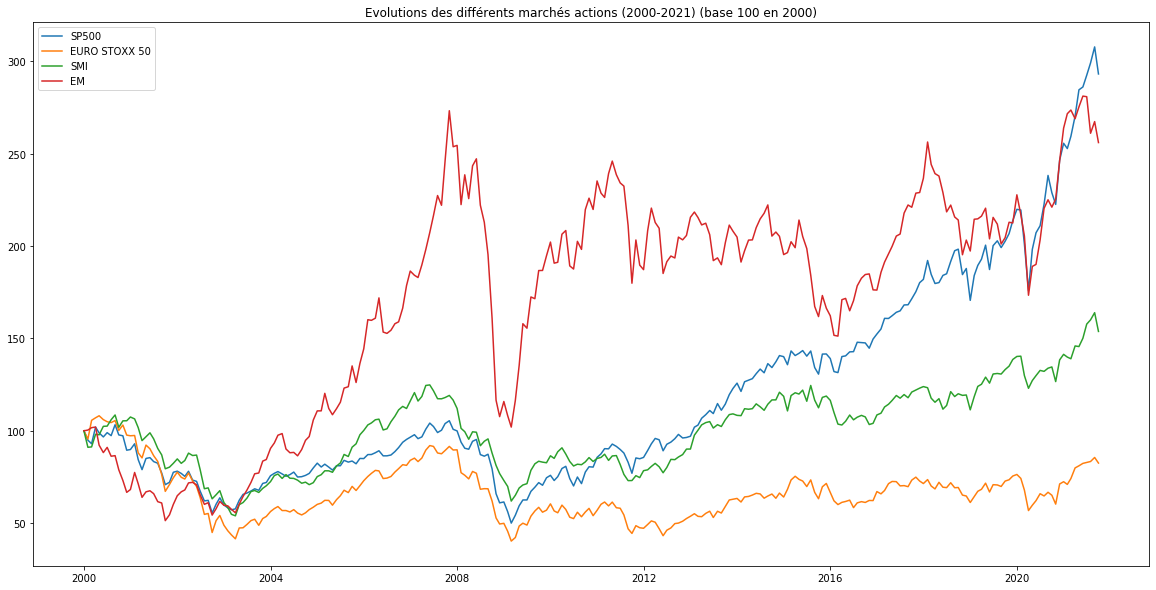

In [4]:
#ACTIONS
plt.figure(figsize=(20, 10))
actions_price = df_actions.iloc[:,[5,11,17,23]]
actions_price_base100 = actions_price / actions_price.iloc[0,:]*100 # base 100
plt.plot(actions_price_base100)
plt.legend(["SP500","EURO STOXX 50", "SMI", "EM"])
plt.title("Evolutions des différents marchés actions (2000-2021) (base 100 en 2000)")
plt.show()

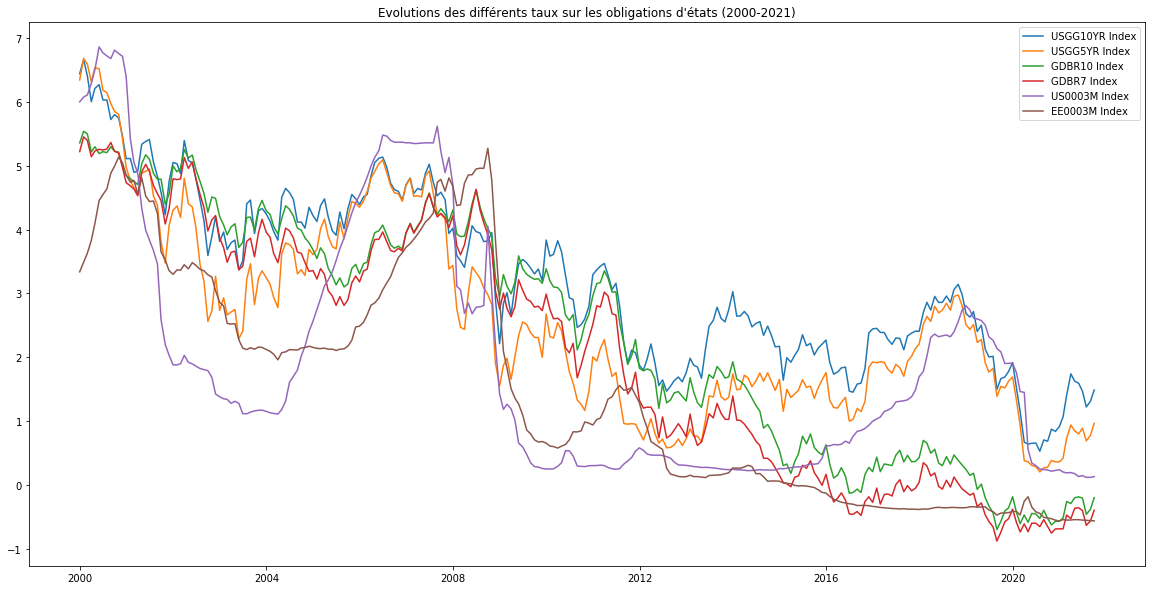

In [5]:
#OBLIG
plt.figure(figsize=(20, 10))
plt.plot(df_bonds)
plt.legend(df_bonds.columns)
plt.title("Evolutions des différents taux sur les obligations d'états (2000-2021)")
plt.show()

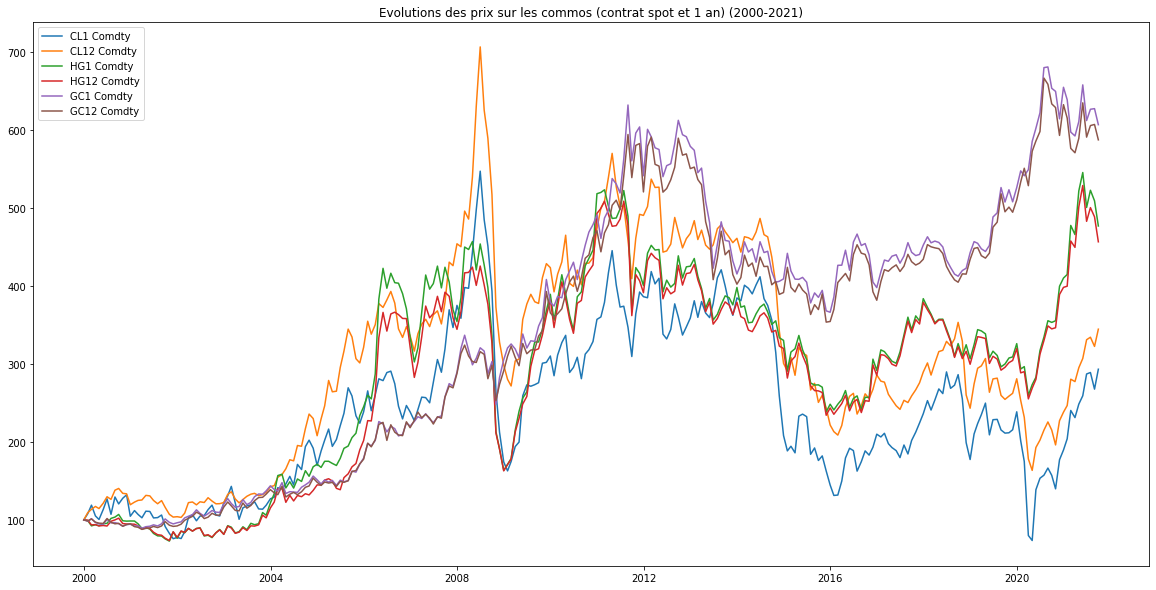

In [6]:
#COMMOS
comme_price_base100 = df_commos / df_commos.iloc[0,:]*100
plt.figure(figsize=(20, 10))
plt.plot(comme_price_base100)
plt.legend(comme_price_base100.columns)
plt.title("Evolutions des prix sur les commos (contrat spot et 1 an) (2000-2021)")
plt.show()

# ACTIONS : DIVIDENDES & EARNING YIELD

In [7]:
actions_EPS = df_actions.iloc[:,[0,6,12,18]]
actions_DPS = df_actions.iloc[:,[2,8,14,20]]

#dividend yield
dividend_yield = pd.DataFrame(actions_DPS.to_numpy() / actions_price.to_numpy())
dividend_yield.columns = ["SP500","EURO STOXX 50", "SMI", "EM"]
dividend_yield.set_index(actions_DPS.index,inplace=True)

#earning yiold
earning_yield = pd.DataFrame(actions_EPS.to_numpy() / actions_price.to_numpy())
earning_yield.columns = ["SP500","EURO STOXX 50", "SMI", "EM"]
earning_yield.set_index(actions_EPS.index,inplace=True)

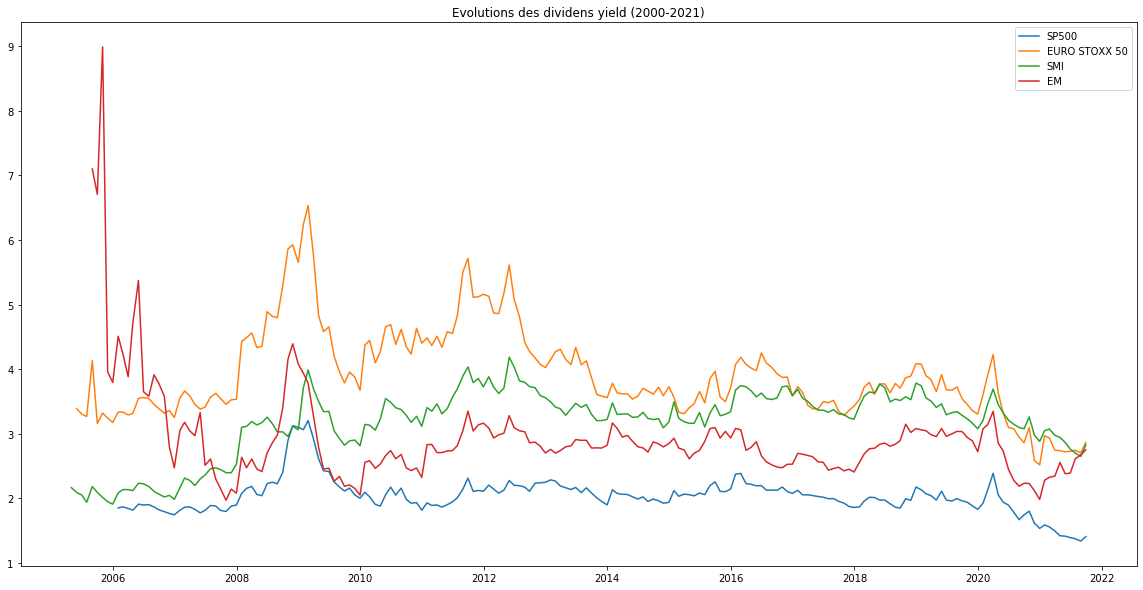

In [8]:
plt.figure(figsize=(20, 10))
plt.plot(dividend_yield*100)
plt.legend(["SP500","EURO STOXX 50", "SMI", "EM"])
plt.title("Evolutions des dividens yield (2000-2021)")
plt.show()

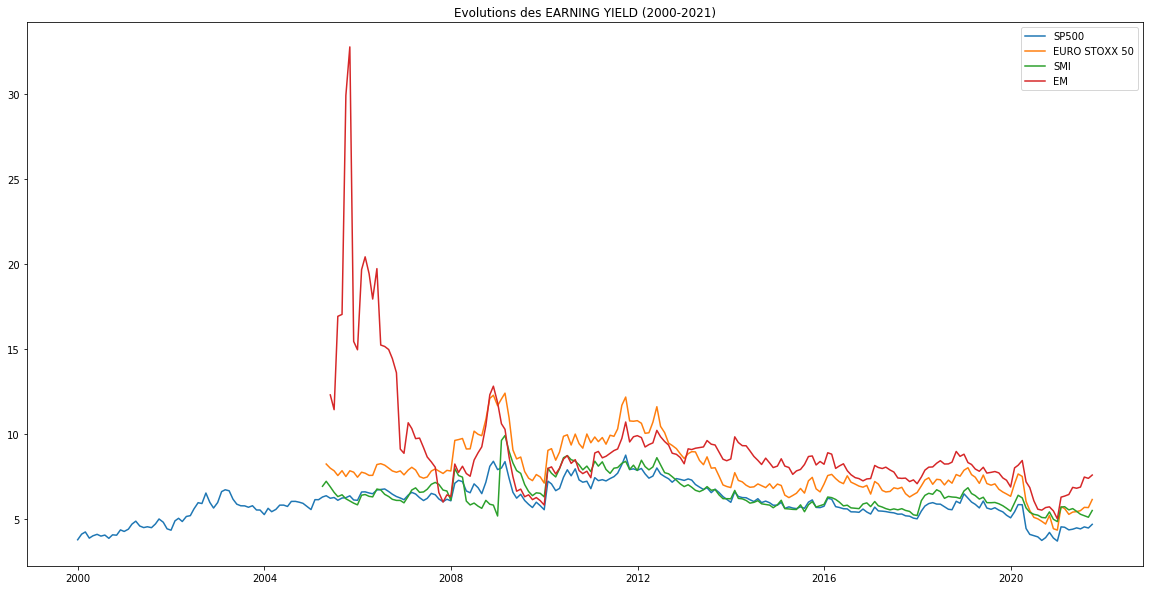

In [21]:
plt.figure(figsize=(20, 10))
plt.plot(earning_yield*100)
plt.legend(["SP500","EURO STOXX 50", "SMI", "EM"])
plt.title("Evolutions des EARNING YIELD (2000-2021)")
plt.show()

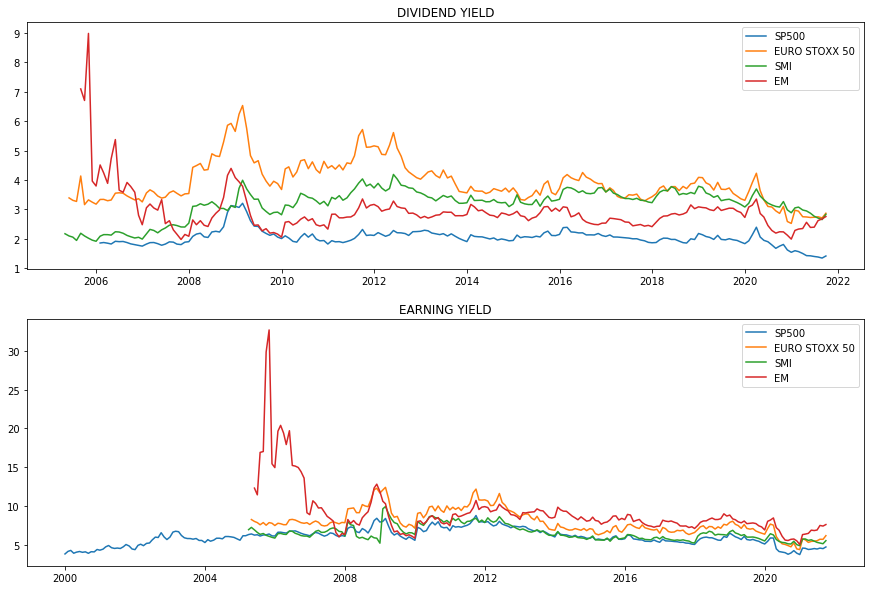

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(15,10))
#fig.suptitle('Horizontally stacked subplots')
ax1.plot(dividend_yield*100)
ax1.set_title('DIVIDEND YIELD')
ax1.legend(["SP500","EURO STOXX 50", "SMI", "EM"])
ax2.plot(earning_yield*100)
ax2.set_title('EARNING YIELD')
ax2.legend(["SP500","EURO STOXX 50", "SMI", "EM"])
plt.show()

# COMMODITIES CARRY

In [11]:
petrole = df_commos.iloc[:,[0,1]]
cooper = df_commos.iloc[:,[2,3]]
gold = df_commos.iloc[:,[4,5]]

In [12]:
petrole_carry = petrole["CL1 Comdty"] / petrole["CL12 Comdty"] - 1
cooper_carry = cooper["HG1 Comdty"] / cooper["HG12 Comdty"] - 1
gold_carry = gold["GC1 Comdty"] / gold["GC12 Comdty"] - 1

data = {"petrole":petrole_carry,"cooper":cooper_carry, "gold":gold_carry}
df_commos_carry = pd.DataFrame(data=data)

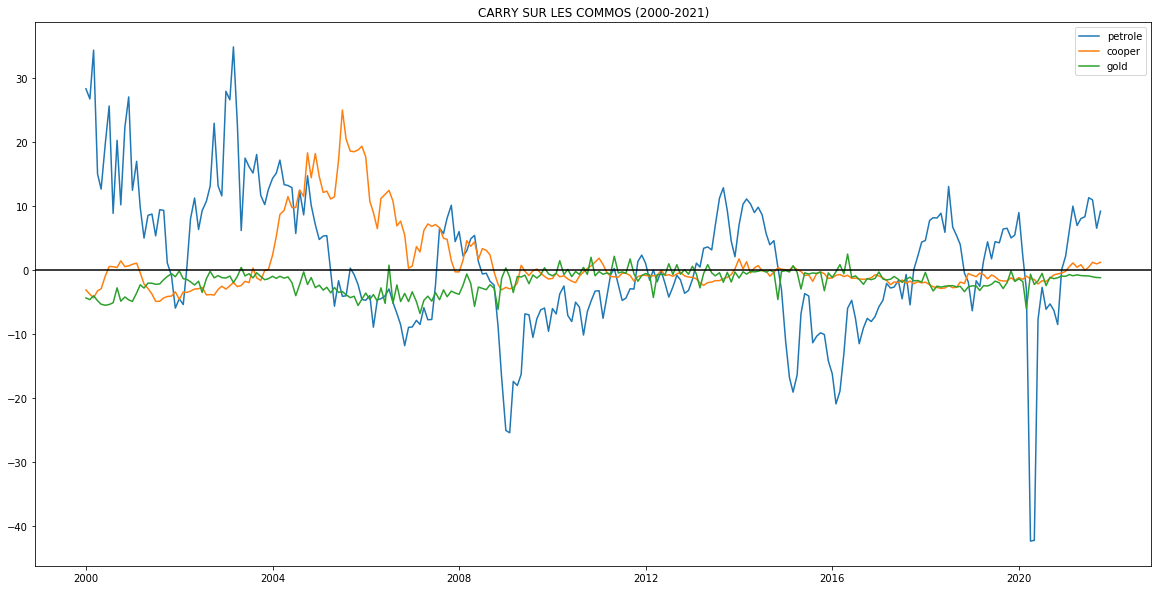

In [13]:
plt.figure(figsize=(20, 10))
plt.plot(df_commos_carry*100)
plt.legend(df_commos_carry.columns)
plt.title("CARRY SUR LES COMMOS (2000-2021)")
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

# CORRELATION ENTRE CARRY ET RETURN FUTUR

perf 1 ans glissante

In [14]:
df_commos_perf1Y = df_commos_carry.iloc[12:262,:]*0

for i in range(0,df_commos_perf1Y.shape[0]):
    df_commos_perf1Y.iloc[i,0] = df_commos.iloc[i+12,0] / df_commos.iloc[i,0] - 1 #petrole
    df_commos_perf1Y.iloc[i,1] = df_commos.iloc[i+12,2] / df_commos.iloc[i,2] - 1 #cooper
    df_commos_perf1Y.iloc[i,2] = df_commos.iloc[i+12,4] / df_commos.iloc[i,4] - 1 #gold
    
df_commos_perf1Y.head(5)

,petrole,cooper,gold
date,,,
2000-12-29,0.046875,-0.013986,-0.055249
2001-01-31,0.036903,-0.004709,-0.063202
2001-02-28,-0.099901,0.027760,-0.089735
2001-03-30,-0.022677,-0.050932,-0.076456
2001-04-30,0.105672,-0.025851,-0.037495


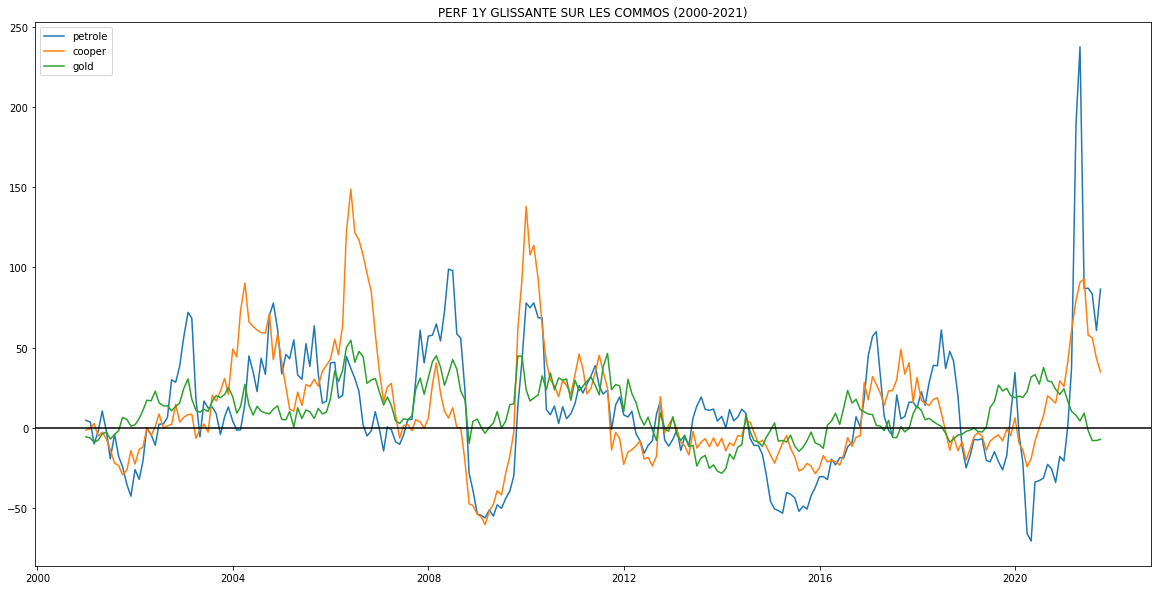

In [15]:
plt.figure(figsize=(20, 10))
plt.plot(df_commos_perf1Y*100)
plt.legend(df_commos_perf1Y.columns)
plt.title("PERF 1Y GLISSANTE SUR LES COMMOS (2000-2021)")
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

In [23]:
#df_commos_carry

In [24]:
#df_commos_perf1Y

correlation entre carry_t et perf1Y_t+1

In [18]:
d1 = {"carry_t":df_commos_carry["petrole"].iloc[0:250].to_numpy(),"perf1Y_t12" : df_commos_perf1Y["petrole"].to_numpy()}
petrole_carry_perf1Y = pd.DataFrame(data=d1)

d2 = {"carry_t":df_commos_carry["cooper"].iloc[0:250].to_numpy(),"perf1Y_t12" : df_commos_perf1Y["cooper"].to_numpy()}
cooper_carry_perf1Y = pd.DataFrame(data=d2)

d3 = {"carry_t":df_commos_carry["gold"].iloc[0:250].to_numpy(),"perf1Y_t12" : df_commos_perf1Y["gold"].to_numpy()}
gold_carry_perf1Y = pd.DataFrame(data=d3)

In [19]:
print("corr entre le carry sur le PETROLE et le rendement 1Y 1 ans plus tard :")
print(petrole_carry_perf1Y.corr())
print("")
print("corr entre le carry sur le COOPER et le rendement 1Y 1 ans plus tard :")
print(cooper_carry_perf1Y.corr())
print("")
print("corr entre le carry sur le GOLD et le rendement 1Y 1 ans plus tard :")
print(gold_carry_perf1Y.corr())
print("")

corr entre le carry sur le PETROLE et le rendement 1Y 1 ans plus tard :
             carry_t  perf1Y_t12
carry_t     1.000000   -0.404541
perf1Y_t12 -0.404541    1.000000

corr entre le carry sur le COOPER et le rendement 1Y 1 ans plus tard :
             carry_t  perf1Y_t12
carry_t     1.000000    0.298448
perf1Y_t12  0.298448    1.000000

corr entre le carry sur le GOLD et le rendement 1Y 1 ans plus tard :
             carry_t  perf1Y_t12
carry_t     1.000000   -0.250238
perf1Y_t12 -0.250238    1.000000



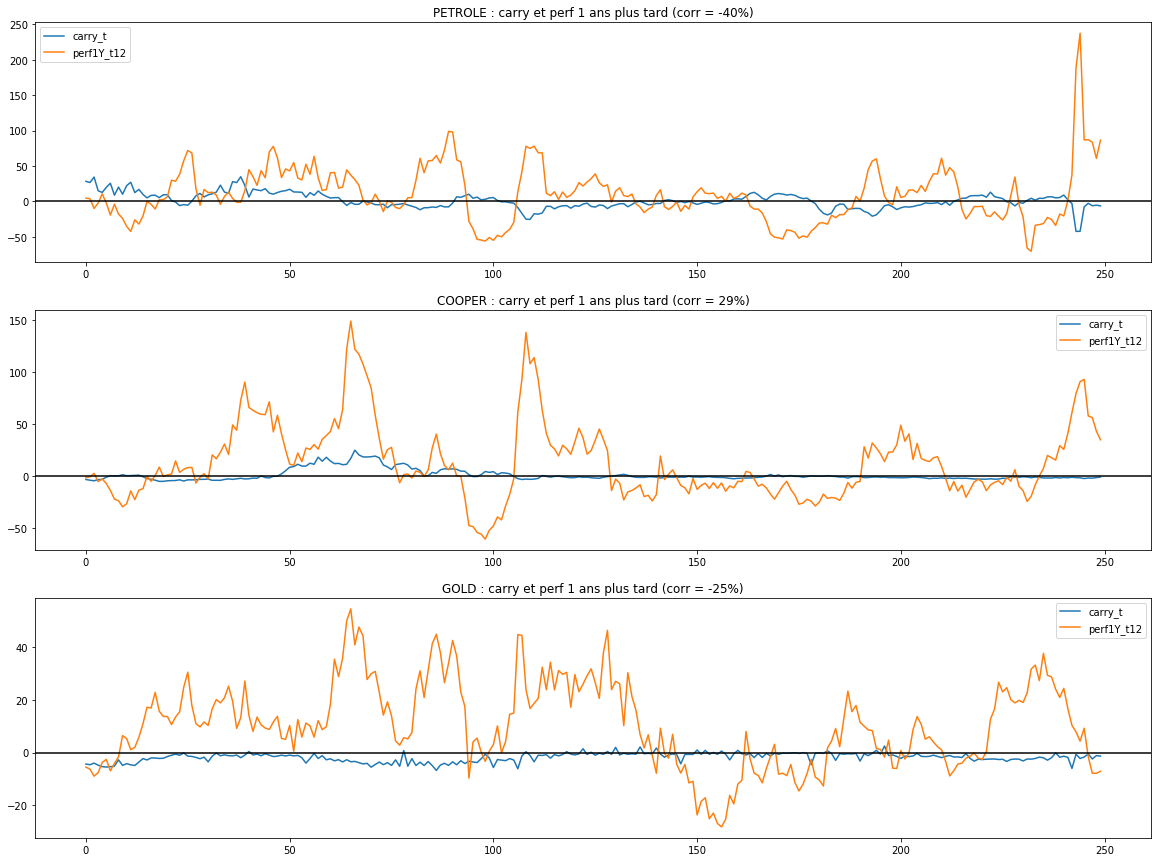

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(20,15))

ax1.plot(petrole_carry_perf1Y*100)
ax1.set_title('PETROLE : carry et perf 1 ans plus tard (corr = -40%)')
ax1.legend(petrole_carry_perf1Y.columns)
ax1.axhline(y=0, color='black', linestyle='-')

ax2.plot(cooper_carry_perf1Y*100)
ax2.set_title('COOPER : carry et perf 1 ans plus tard (corr = 29%)')
ax2.legend(cooper_carry_perf1Y.columns)
ax2.axhline(y=0, color='black', linestyle='-')

ax3.plot(gold_carry_perf1Y*100)
ax3.set_title('GOLD : carry et perf 1 ans plus tard (corr = -25%)')
ax3.legend(gold_carry_perf1Y.columns)
ax3.axhline(y=0, color='black', linestyle='-')

plt.show()

# CARRY EQUITY (carry = dividend yield + buy back --> estimé par le Earning yield)

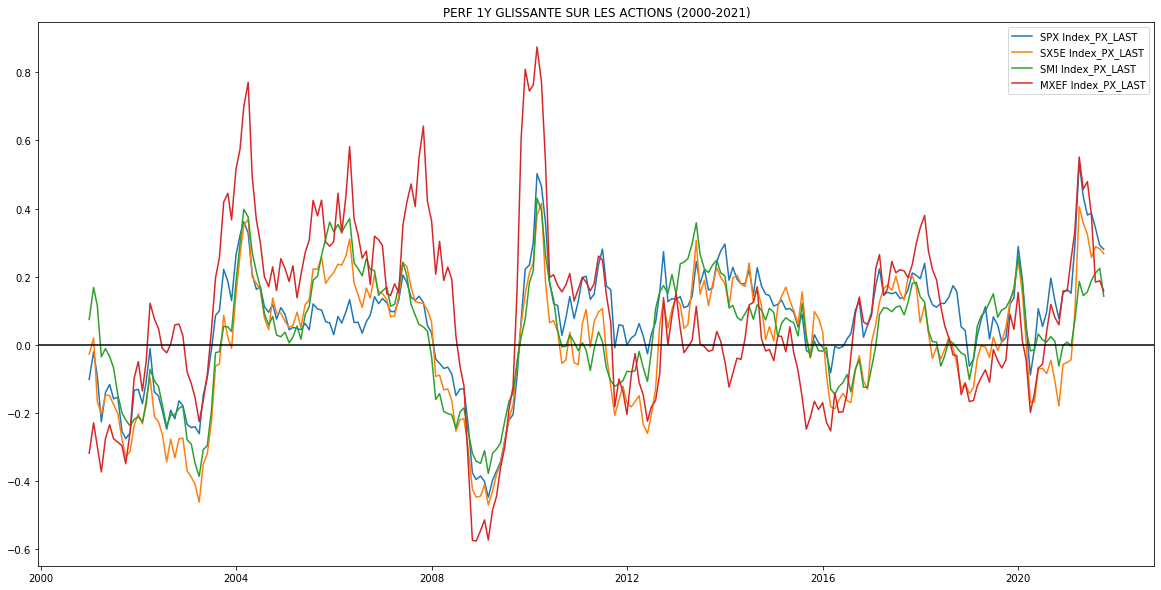

In [55]:
#PERF 1Y GLISSANTE
df_actions_perf1Y = actions_price.iloc[12:262,:]*0

for i in range(0,df_actions_perf1Y.shape[0]):
    df_actions_perf1Y.iloc[i,0] = actions_price.iloc[i+12,0] / actions_price.iloc[i,0] - 1 # SP500
    df_actions_perf1Y.iloc[i,1] = actions_price.iloc[i+12,1] / actions_price.iloc[i,1] - 1 # EUROSTOXX50
    df_actions_perf1Y.iloc[i,2] = actions_price.iloc[i+12,2] / actions_price.iloc[i,2] - 1 # SMI
    df_actions_perf1Y.iloc[i,3] = actions_price.iloc[i+12,3] / actions_price.iloc[i,3] - 1 # EM
    
    
plt.figure(figsize=(20, 10))
plt.plot(df_actions_perf1Y)
plt.legend(df_actions_perf1Y.columns)
plt.title("PERF 1Y GLISSANTE SUR LES ACTIONS (2000-2021)")
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

df_actions_perf1Y.columns = earning_yield.columns

In [64]:
d5 = {"carry_t":earning_yield["SP500"].iloc[0:250].to_numpy(),"perf1Y_t12" : df_actions_perf1Y["SP500"].to_numpy()}
SP500_carry_perf1Y = pd.DataFrame(data=d5)

d6 = {"carry_t":earning_yield["EURO STOXX 50"].iloc[0:250].to_numpy(),"perf1Y_t12" : df_actions_perf1Y["EURO STOXX 50"].to_numpy()}
STOXX50_carry_perf1Y = pd.DataFrame(data=d6)

d7 = {"carry_t":earning_yield["SMI"].iloc[0:250].to_numpy(),"perf1Y_t12" : df_actions_perf1Y["SMI"].to_numpy()}
SMI_carry_perf1Y = pd.DataFrame(data=d7)

d8 = {"carry_t":earning_yield["EM"].iloc[0:250].to_numpy(),"perf1Y_t12" : df_actions_perf1Y["EM"].to_numpy()}
EM_carry_perf1Y = pd.DataFrame(data=d8)

In [71]:
print("corr entre le carry sur le SP500 et le rendement 1Y 1 an plus tard :")
print(SP500_carry_perf1Y.corr()*100)
print("")
print("corr entre le carry sur le EURO STOXX 50 et le rendement 1Y 1 an plus tard :")
print(STOXX50_carry_perf1Y.corr()*100)
print("")
print("corr entre le carry sur le SMI et le rendement 1Y 1 an plus tard :")
print(SMI_carry_perf1Y.corr()*100)
print("")
print("corr entre le carry sur le EMERGING MARKET et le rendement 1Y 1 an plus tard :")
print(EM_carry_perf1Y.corr()*100)
print("")

corr entre le carry sur le SP500 et le rendement 1Y 1 an plus tard :
               carry_t  perf1Y_t12
carry_t     100.000000   30.266939
perf1Y_t12   30.266939  100.000000

corr entre le carry sur le EURO STOXX 50 et le rendement 1Y 1 an plus tard :
               carry_t  perf1Y_t12
carry_t     100.000000    1.201637
perf1Y_t12    1.201637  100.000000

corr entre le carry sur le SMI et le rendement 1Y 1 an plus tard :
               carry_t  perf1Y_t12
carry_t     100.000000   18.276579
perf1Y_t12   18.276579  100.000000

corr entre le carry sur le EMERGING MARKET et le rendement 1Y 1 an plus tard :
              carry_t  perf1Y_t12
carry_t     100.00000    30.56697
perf1Y_t12   30.56697   100.00000



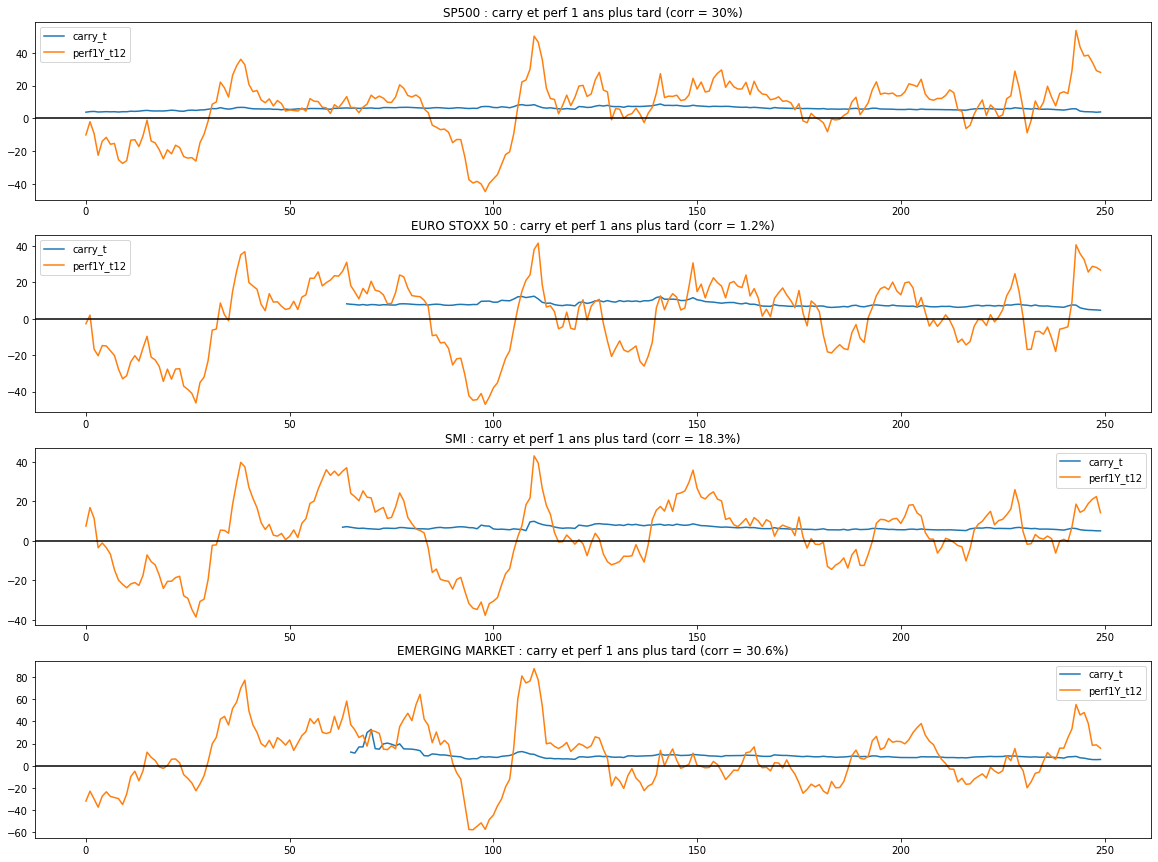

In [73]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1,figsize=(20,15))

ax1.plot(SP500_carry_perf1Y*100)
ax1.set_title('SP500 : carry et perf 1 ans plus tard (corr = 30%)')
ax1.legend(petrole_carry_perf1Y.columns)
ax1.axhline(y=0, color='black', linestyle='-')

ax2.plot(STOXX50_carry_perf1Y*100)
ax2.set_title('EURO STOXX 50 : carry et perf 1 ans plus tard (corr = 1.2%)')
ax2.legend(cooper_carry_perf1Y.columns)
ax2.axhline(y=0, color='black', linestyle='-')

ax3.plot(SMI_carry_perf1Y*100)
ax3.set_title('SMI : carry et perf 1 ans plus tard (corr = 18.3%)')
ax3.legend(gold_carry_perf1Y.columns)
ax3.axhline(y=0, color='black', linestyle='-')

ax4.plot(EM_carry_perf1Y*100)
ax4.set_title('EMERGING MARKET : carry et perf 1 ans plus tard (corr = 30.6%)')
ax4.legend(gold_carry_perf1Y.columns)
ax4.axhline(y=0, color='black', linestyle='-')

plt.show()